In [1]:
# Import all necessary libraries here
import numpy as np
import math
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

# Discrete Random Variables

For discreet random variable, the mean or the expected value is defined as:

\begin{align}
μ = E(x) = ∑x.p(x)
\end{align}

and variance is given by:

\begin{align}
σ^2 = Var(x) = ∑(x-μ)^2.p(x)
\end{align}

**Question 1**: Calculate the mean and variance of the discreet variable x whose probability distribution is given by:

x = [-1, 0, 1, 4] \\
P(x) = [0.2, 0.5, 0.2, 0.1]

In [2]:
# Calculate the mean and variance of the set points given to you. 
# Your code should reflect the logic you built for calculating the mean and variance
# You can't use any library for mean and variance but only the helper functions
# Please don't forget to return the answer

def discrete_mean(points, probabilities):
  mean = 0
  for i in range(len(points)): 
    mean+=points[i]* probabilities[i]    
  return mean

def discrete_variance(points, probabilities):
  mean = discrete_mean(points, probabilities)
  variance = 0
  for i in range(len(points)): 
    variance += ((points[i]- mean)**2)*probabilities[i]
  return variance

if __name__ == "__main__":
  points = [-1, 0, 1, 4]
  probabilities = [0.2, 0.5, 0.2, 0.1]

  mean = discrete_mean(points, probabilities)
  variance = discrete_variance(points, probabilities)

  print("The mean is ", mean, " and the variance is ", variance)

The mean is  0.4  and the variance is  1.8400000000000003


## Bernoulli's Distribution

### Bayesian estimates and Maximum Likelihood estimates calculation

The maximum likelihood estimate can be calculated by:

\begin{align}
μ_{MLE} = \frac{m}{N}, \quad where \quad m =  &\sum_{i=0}^N x_i  
\end{align}

The Bayesian estimate is given by:

\begin{align}
μ_{Bayesian} = \frac{(a+m)}{a + b + N}, \quad where \quad m =  &\sum_{i=0}^N x_i \quad \text{and a and b reflect the initial information about the distribution}
\end{align}

**Question 2**: In a coin toss experiment, we are running 100 simulations and we have prior knowledge that in the prior beta distribution, left parameter a is 6 and right parameter b is 10. The code for bernoulli's distribution has already been mentioned. X_samples will contain the data points. Calculate the MLE and Bayesian estimates and write your observations on them.

In [3]:
def bernoulli_distribution():
  p = 0.5
  X = bernoulli(p)
  return X

a = 6
b = 10 
def compare_estimates(N):
  ## Extracting the number of required samples from the distribution
  X = bernoulli_distribution()
  X_samples = X.rvs(N)

  # Maxmimum likely estimate is given by the sample mean, which is the total number of 1s/N
  success = 0
  for i in range(len(X_samples)): 
    success += X_samples[i]
  maximum_likelihood_estimate = success/N

  bayesian_estimate = (a+success)/(a+b+N)

  return bayesian_estimate, maximum_likelihood_estimate




if __name__ == "__main__":
  
  sample_sizes = [10, 15, 20 , 50, 100]
  for i in sample_sizes:
    bayesian_estimate, maximum_likelihood_estimate = compare_estimates(i)
    print(" For sample size: ", i , " " , "Bayesian estimate : " ,bayesian_estimate, " and MLE : ", maximum_likelihood_estimate)


 For sample size:  10   Bayesian estimate :  0.4230769230769231  and MLE :  0.5
 For sample size:  15   Bayesian estimate :  0.41935483870967744  and MLE :  0.4666666666666667
 For sample size:  20   Bayesian estimate :  0.4444444444444444  and MLE :  0.5
 For sample size:  50   Bayesian estimate :  0.5606060606060606  and MLE :  0.62
 For sample size:  100   Bayesian estimate :  0.49137931034482757  and MLE :  0.51


Write your observations here.

As the sample size increases, both MLE and Bayesian  estimate approach the same value.

# Continuous Variables

Given a probability density function, we calculate mean or the expected value as:

\begin{align}
   E(X)  \quad or  \quad \text{μ = } &\int_{-\infty}^{+\infty}  x.f(x) \mathrm{d}x \ \\[1em]
\end{align}

and the varince is calculated as:

\begin{align}
Var(X) = E(X^2) - μ^2
\end{align}


\begin{align}
\text{E(X^2) = } &\int_{-\infty}^{+\infty}  x^2.f(x) \mathrm{d}x \ \\[1em]
\end{align}

**Question 3**: Given a continuous random variable x, the probability density function is defined as:

\begin{align}
        \text{f}(x) = \left\{
        \begin{array}{cl}
        \frac{sinx}{2} & 0 \le x \le \pi \\
        0 & elsewhere
        \end{array}
        \right.
    \end{align}

You have to calculate the mean and variance of the continuous random variable x.

For this question, you will need to calculate the integral of this function, you can use either of the following ways:

*   Calculate the integral by hand, mention it as a separate function during the implementation and then pass the variable to get the output 
*   Use Scipy library. Scipy library provides a ton of mathematical tools for calculation of integral. You can use it as:


```
# Import the libraries
import scipy.integrate as integrate
import math

# Define the function that needs to be integrated
def f(x):
    return math.sin(x)

# Define the bounds of the integral
a = 0
b = math.pi

# Get the scipy approximate value of the integral in the given range
integrate.quad(f,a,b)
```

You can either use this(or similar) piece of code for calculation of integral or you can simply calculate the integral on paper and write its function and get the values of the output for the mean and variance.

Refer [this](https://www.tutorialspoint.com/scipy/scipy_integrate.htm#:~:text=The%20quad%20function%20returns%20the,in%20the%20value%20of%20integral.) article for more info on integrate.quad function.


Error upto 5% in the actual values is acceptable.

In [4]:
# Calculate the mean and variance of the continuous given to you. 
# Your code should reflect the logic you built for calculating the mean and variance
# You can't use any library for mean and variance but only the helper functions
# Refer the above piece of code if needed for integral
# Please don't forget to return the answer
import scipy.integrate as integrate
import math 

# Function to integrate ober
def f(x):
    return (math.sin(x))/2

a = 0 
b = math.pi

def continuous_mean():
  integrand = lambda x: x * f(x)
  integral_result, error = integrate.quad(integrand, a, b)

  return integral_result

def continuous_variance():
  variance_integrand  = lambda x: x**2 *f(x)
  integrand_result, error = integrate.quad(variance_integrand, a,b)
  variance = integrand_result - continuous_mean()**2
  
  return variance


if __name__ == "__main__":

  mean = continuous_mean()
  variance = continuous_variance()

  print("The mean is ", mean, " and the variance is ", variance)

The mean is  1.5707963267948966  and the variance is  0.46740110027233994


## Central Limit Theorum

**Question 4**: Take a large dataset of random variables, for eg: N = 10000. Using numpy library form a set of random numbers of size N. This will be your population size. Then take a sample size which will be a random subset of the population size. Iterate the loop for the number of times as population and calculate the mean for the extracted sample and store it in an array. Remember the size of the mean array and the population size will be same. Visualize the histogram using matplotlib or seaborn library(matplotlib recommended). Increase the sample size and repeat the experiment. You have to take atleast 4 sample sizes and compare their histogram.

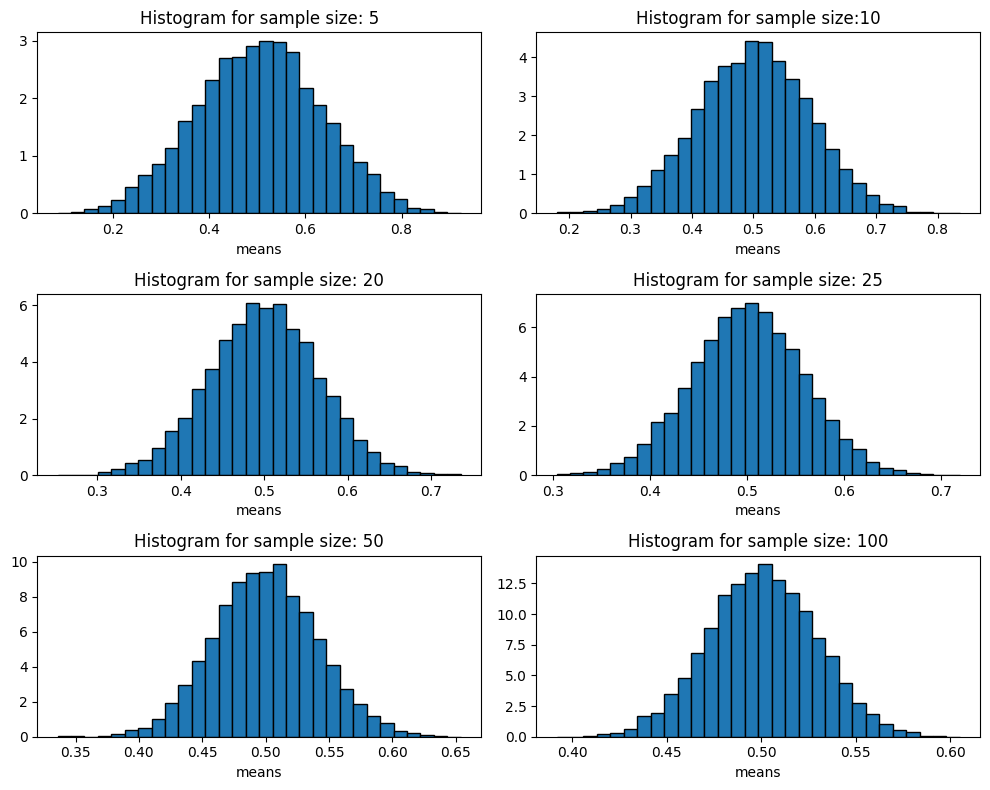

In [5]:
N = 10000
population = np.random.rand(N)
sample_sizes = [5,10,20, 25, 50, 100]
histogram_sample_means = [] # list to store all the means arrays for different sample sizes 


#For all the given sample sizes 
for sample_size in sample_sizes: 
    sample_means =[]
    #Calculate the sample mean N times (population size)
    for n in range(N):
        sample_population = np.random.choice(population, size=sample_size, replace=False)
        sample_value = 0 
        # Iterate over the sample to calculate mean
        for i in range(len(sample_population)):
            sample_value += sample_population[i]
        sample_mean = sample_value/ sample_size
        sample_means.append(sample_mean)

    histogram_sample_means.append(sample_means)


fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

axes[0,0].hist(histogram_sample_means[0], bins=30, density=True, edgecolor='black')
axes[0,0].set_title("Histogram for sample size: " + str(sample_sizes[0]) )
axes[0,0].set_xlabel("means")

axes[0,1].hist(histogram_sample_means[1], bins=30, density=True, edgecolor='black')
axes[0,1].set_title("Histogram for sample size:" + str(sample_sizes[1]) )
axes[0,1].set_xlabel("means")

axes[1,0].hist(histogram_sample_means[2], bins=30, density=True, edgecolor='black')
axes[1,0].set_title("Histogram for sample size: " + str(sample_sizes[2])  )
axes[1,0].set_xlabel("means")

axes[1,1].hist(histogram_sample_means[3], bins=30, density=True, edgecolor='black')
axes[1,1].set_title("Histogram for sample size: " +  str(sample_sizes[3]) )
axes[1,1].set_xlabel("means")

axes[2,0].hist(histogram_sample_means[4], bins=30, density=True, edgecolor='black')
axes[2,0].set_title("Histogram for sample size: " + str(sample_sizes[4]) )
axes[2,0].set_xlabel("means")

axes[2,1].hist(histogram_sample_means[5], bins=30, density=True, edgecolor='black')
axes[2,1].set_title("Histogram for sample size: " +  str(sample_sizes[5]) )
axes[2,1].set_xlabel("means")


plt.tight_layout()
plt.show()

The histogram looks more symmetrical as sample size increases. However, all look like they roughly have a gaussian distribution.